Osho Gnanasivam

## Research Question #1

**Initial:** Understanding the effect of different variables on the charges of medical coverage to find out a relationship between them.

**Second:** Between Smoking and Obesity, which factor contributes more to higher charges of medical coverage?

## Description of Variables

- **Age:** Age of primary beneficiary
- **Sex:** Insurance contractor gender: female, male
- **BMI:** Body Mass Index, used as an indicator of body health, weights that are relatively high or low relative to height, objective index of body              weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9
- **Children:** Number of children covered by health insurance / Number of dependents (of beneficiary)
- **Smoker:** Whether beneficiary smokes or not
- **Region:** the beneficiary's residential area in the US: northeast, southeast, southwest, northwest.
- **Charges:** Individual medical costs billed by health insurance

In [ ]:
import pandas as pd
import project_functions1 as pf 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


## Processed Data Set ##

In [ ]:
df = pf.load_and_process("../data/raw/raw_MC.csv")
display(df)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Ranges and Unique Values in each column ##

In [ ]:
pf.rng_and_unqval(df)

Age Range: 18 to 64
BMI Range: 15.96 to 53.13
Unique values in "Children": [0 1 3 2 5 4]
Unique values in "Sex": ['female' 'male']
Unique values in "Smoker": ['yes' 'no']
Unique values in "Region": ['southwest' 'southeast' 'northwest' 'northeast']


**All values** are appropriate, accurate and there is no outright redundancy in them. They can be used for analysis.

## Identifying Outliers and removing them from the dataframe ##

Total number of outliers are 7


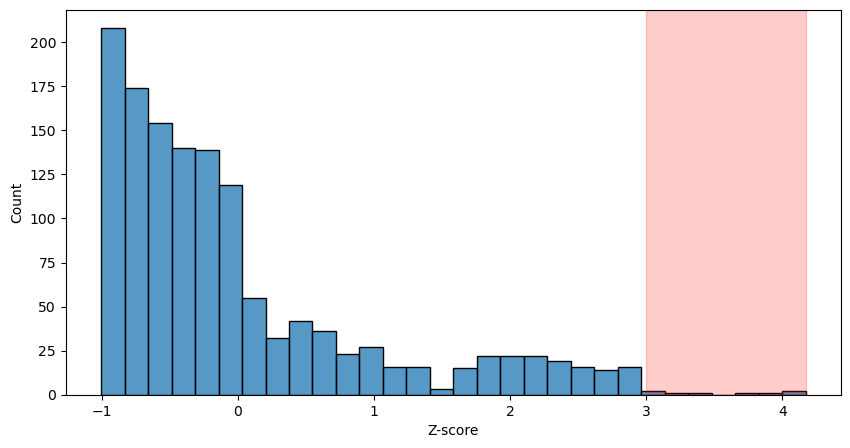

In [ ]:
pf.find_outliers(df.charges)
df = df[(df['charges'] < 3) | (df['charges'] > -3)] #Removes outliers that are not within the 99% confidence interval from dataset.

## Correlation Matrix ##

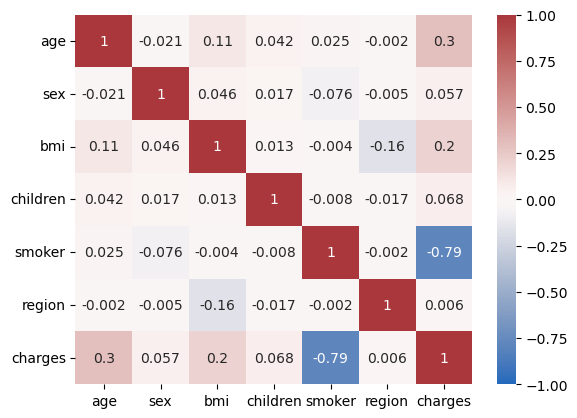

In [ ]:
df2 = pf.convert_catdata(df)
corr = df2.corr().round(3)
sns.heatmap(corr, annot=True, vmax=1, vmin=-1, center=0, cmap='vlag')
plt.show()

### General correlations ###
- Smoking has a strong negative correlation with the insurance charges (Medical costs billed tend to be lower for beneficiaries who are non-smokers)
- Age has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries who are older)
- BMI has a slight positive correlation with the insurance charges (Medical costs billed tend to be higher for beneficiaries with a higher BMI)
- Strange negative correlation between bmi and region.

In [ ]:
df["BMI_Class"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "BMI_Class"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 25), "BMI_Class"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 30), "BMI_Class"] = "Overweight"
    col.loc[col["bmi"] >= 30, "BMI_Class"] = "Obese"
    
df

,age,sex,bmi,children,smoker,region,charges,BMI_Class
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,Obese
2,28,male,33.000,3,no,southeast,4449.46200,Obese
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight
4,32,male,28.880,0,no,northwest,3866.85520,Overweight
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese
1334,18,female,31.920,0,no,northeast,2205.98080,Obese
1335,18,female,36.850,0,no,southeast,1629.83350,Obese
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight


## Comparing Age and Smoking against Charges

<seaborn.axisgrid.FacetGrid>

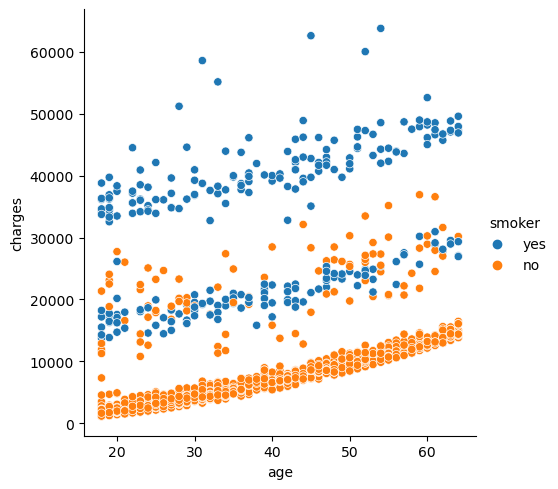

In [ ]:
sns.relplot(x = 'age', y = 'charges', hue = 'smoker',palette = 'tab10',data = df)

In [ ]:
df["SMOB Status"] = np.nan
lst = [df]

for col in lst:
    col.loc[((col["BMI_Class"] != 'Obese') & (col["smoker"] == 'yes')), "SMOB Status"] = "Non-obese Smoker"
    col.loc[((col["BMI_Class"] == 'Obese') & (col["smoker"] == 'no')), "SMOB Status"] = "Obese non-smoker"
    col.loc[((col["BMI_Class"] == 'Obese') & (col["smoker"] == 'yes')), "SMOB Status"] = "Obese Smoker"
    
df

,age,sex,bmi,children,smoker,region,charges,BMI_Class,SMOB Status
0,19,female,27.900,0,yes,southwest,16884.92400,Overweight,Non-obese Smoker
1,18,male,33.770,1,no,southeast,1725.55230,Obese,Obese non-smoker
2,28,male,33.000,3,no,southeast,4449.46200,Obese,Obese non-smoker
3,33,male,22.705,0,no,northwest,21984.47061,Normal Weight,NaN
4,32,male,28.880,0,no,northwest,3866.85520,Overweight,NaN
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,Obese,Obese non-smoker
1334,18,female,31.920,0,no,northeast,2205.98080,Obese,Obese non-smoker
1335,18,female,36.850,0,no,southeast,1629.83350,Obese,Obese non-smoker
1336,21,female,25.800,0,no,southwest,2007.94500,Overweight,NaN


In [ ]:
df['SMOB Status'].describe()

count                  836
unique                   3
top       Obese non-smoker
freq                   562
Name: SMOB Status, dtype: object

<AxesSubplot: xlabel='SMOB Status', ylabel='charges'>

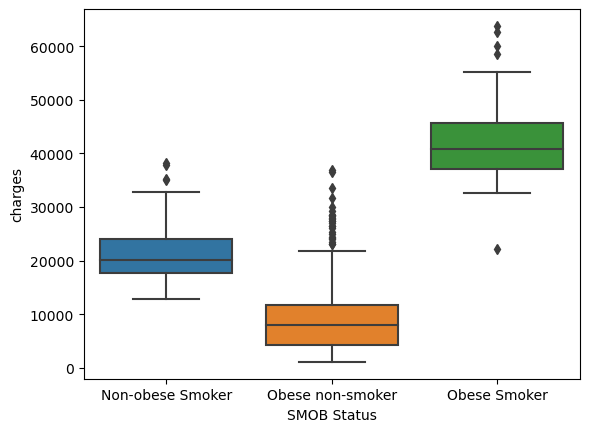

In [ ]:
sns.boxplot(df, x = 'SMOB Status', y ='charges')

## Comparing BMI against Charges

<seaborn.axisgrid.FacetGrid>

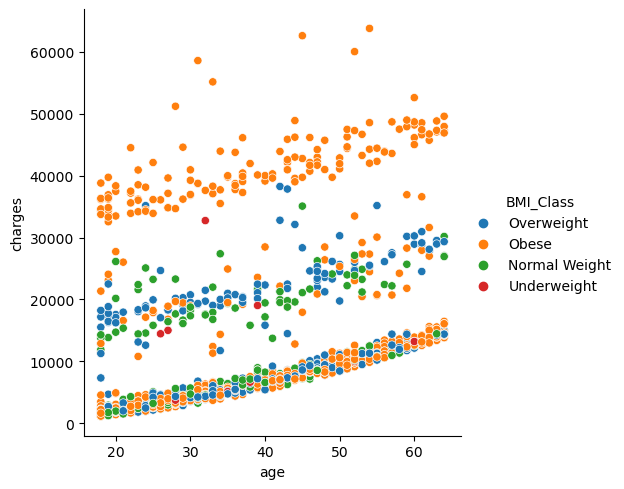

In [ ]:
sns.relplot(x = 'age', y = 'charges', hue = 'BMI_Class',palette = 'tab10',data = df)

## Comparing BMI against Region

<AxesSubplot: xlabel='region', ylabel='Count'>

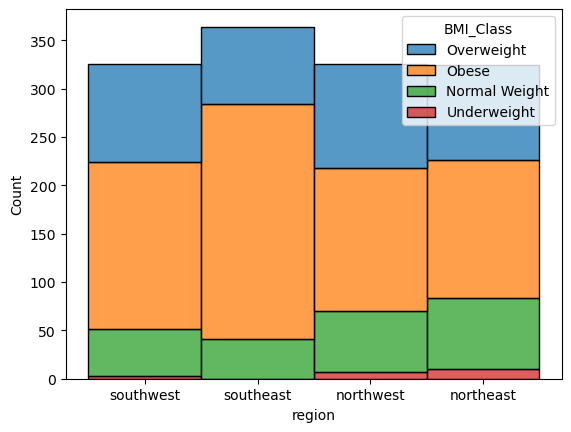

In [ ]:
sns.histplot(binwidth=0.5, x="region", hue="BMI_Class", data=df, stat="count", multiple="stack")

## Observations and Analysis

- There is a very obvious increase in medical charges claimed as the age of the beneficary rises. This is a very significant insight that can be observed from the Age and Smoking against Charges plot.
- It can also be observed that no smoking beneficiary had a claim of lesser than $10000 regardless of age or any other key factor. It can be concluded from this dataset, that smokers tend to claim a higher amount in insurance coverages than their non-smoking counter-part.
- With reference to the BMI against Charges plot, it can be observed that a large cluster tends to be within the 0-15000 range while a few points can be observed to be dispersed towards a higher value of charges as BMI increases. This explains the smaller correlation value that BMI had on the Charges as seen in the correlation matrix. It is unclear whether a larger BMI would mean a greater insurance claim from this dataset and more data would be required for something definitive.
- The BMI of beneficiaries in the South-east region have a significantly higher BMI than the other regions.
